<a href="https://colab.research.google.com/github/Shay-7278/ECE364_2025/blob/Homework/A1_Ashley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""

import getpass
from google.colab import userdata

%cd /content
!git clone https://github.com/Shay-7278/ECE364_2025.git
%cd ECE364_2025

!git config --global user.email "an7278@princeton.edu"
!git config --global user.name "Shay-7278"

token = userdata.get('token')
!git remote set-url origin https://{token}@github.com/Shay-7278/ECE364_2025.git

"""


/content
Cloning into 'ECE364_2025'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 5), reused 19 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 3.35 MiB | 29.28 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/ECE364_2025
✅ GitHub setup complete. Ready to pull/push!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

random_state=5 # use this to control randomness across runs e.g., dataset partitioning

In [4]:
# Load the dataset from a CSV file
data = pd.read_csv('/content/ECE364_2025/A1/heart.csv')

# Display the first five instances in the dataset
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:

# Looking at statistics of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Looking at the statistics of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'Count')

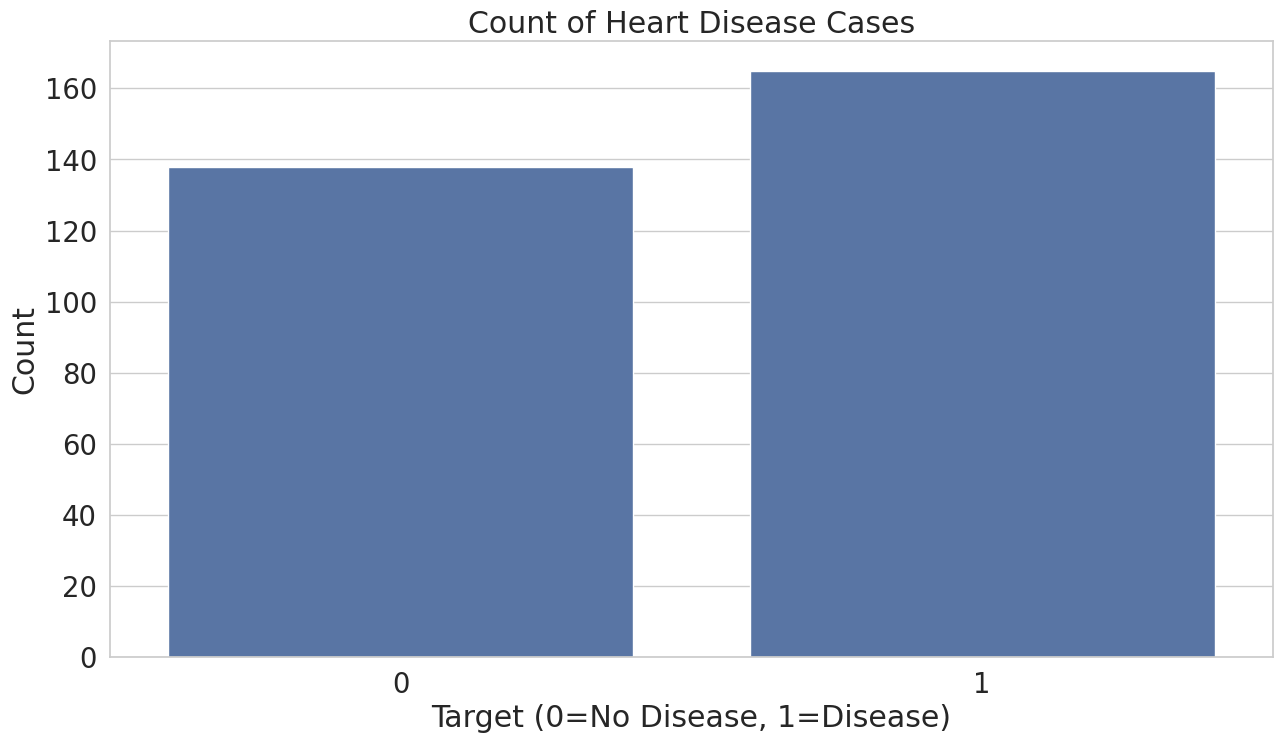

In [7]:

# Checking how many instances of each target class there are

sns.set_theme(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='target',data=data).set_title('Count of Heart Disease Cases')
plt.xlabel('Target (0=No Disease, 1=Disease)')
plt.ylabel('Count')

In [8]:
# Compute mean values for each feature grouped by target
data.groupby('target', as_index=False).mean()

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


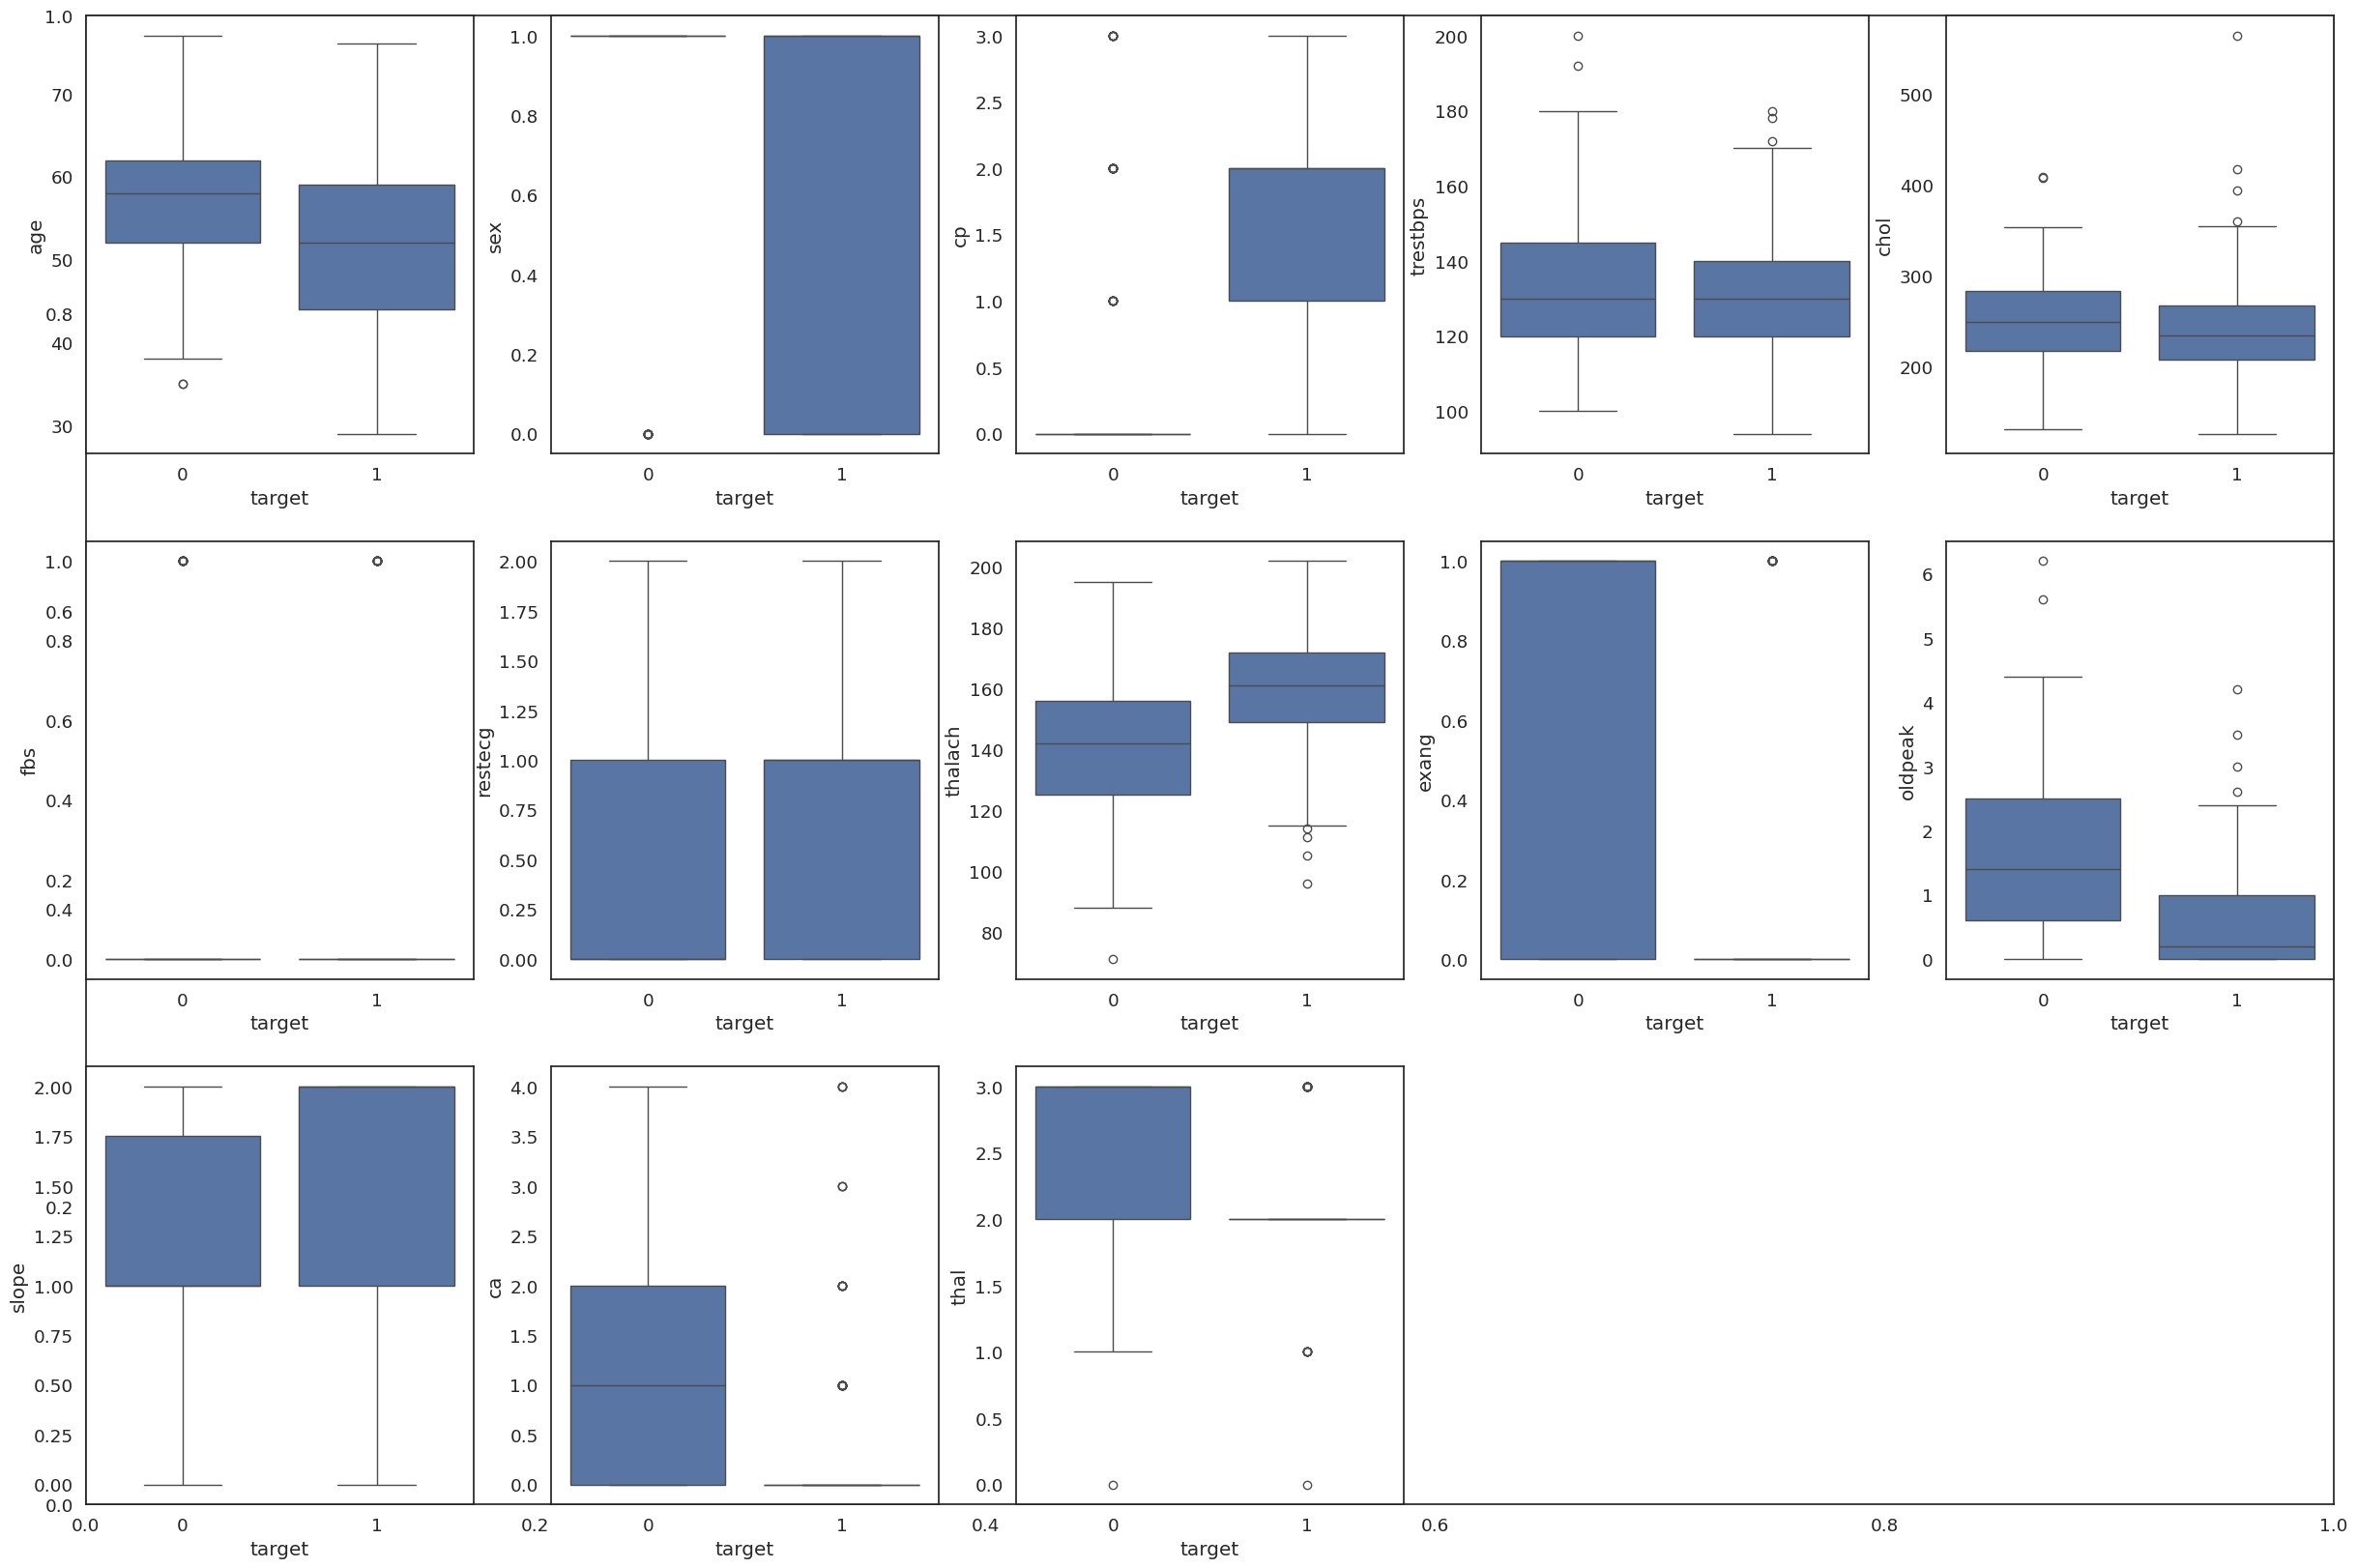

In [9]:
# Creating box plots to see the distribution of each feature
sns.set_theme(style="white", font_scale=1.2)
plt.subplots(figsize = (30,20))
plt.subplot(3,5,1)
sns.boxplot(x='target', y='age', data=data)
plt.subplot(3,5,2)
sns.boxplot(x='target', y='sex', data=data)
plt.subplot(3,5,3)
sns.boxplot(x='target', y='cp', data=data)
plt.subplot(3,5,4)
sns.boxplot(x='target', y='trestbps', data=data)
plt.subplot(3,5,5)
sns.boxplot(x='target', y='chol', data=data)
plt.subplot(3,5,6)
sns.boxplot(x='target', y='fbs', data=data)
plt.subplot(3,5,7)
sns.boxplot(x='target', y='restecg', data=data)
plt.subplot(3,5,8)
sns.boxplot(x='target', y='thalach', data=data)
plt.subplot(3,5,9)
sns.boxplot(x='target', y='exang', data=data)
plt.subplot(3,5,10)
sns.boxplot(x='target', y='oldpeak', data=data)
plt.subplot(3,5,11)
sns.boxplot(x='target', y='slope', data=data)
plt.subplot(3,5,12)
sns.boxplot(x='target', y='ca', data=data)
plt.subplot(3,5,13)
sns.boxplot(x='target', y='thal', data=data)
plt.show()

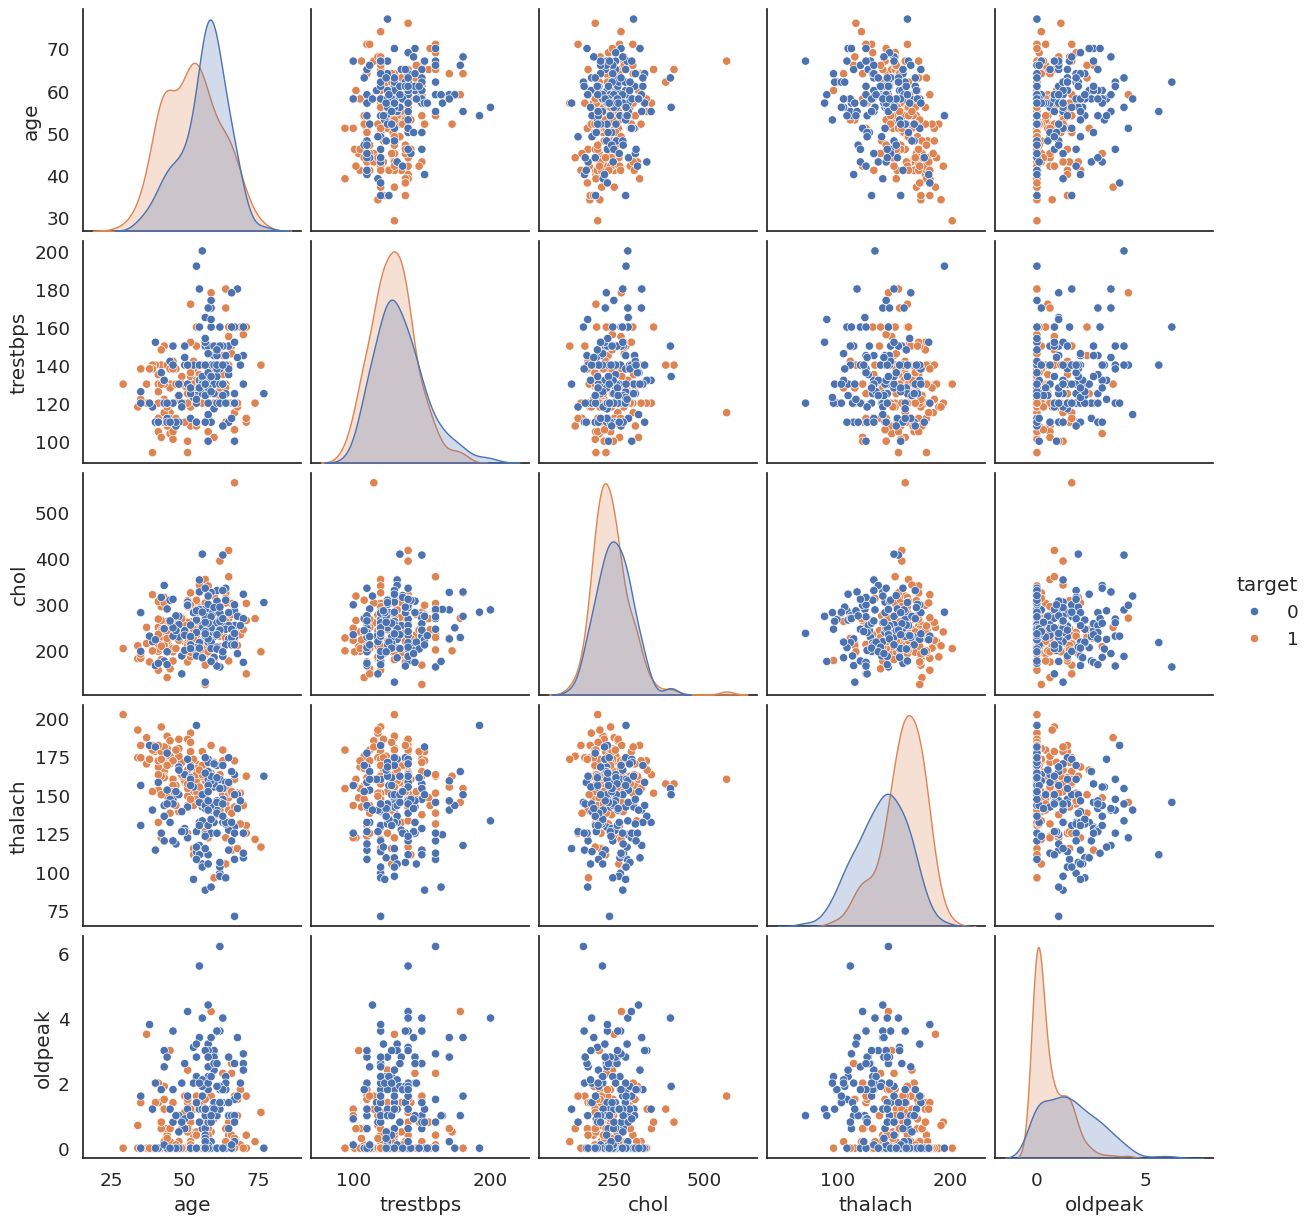

In [10]:
# Creating a pairplot to display pairwise relationship

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Select a subset of features for visualization
sns.pairplot(data[['age','trestbps','chol','thalach','oldpeak','target']], hue='target')

<Axes: >

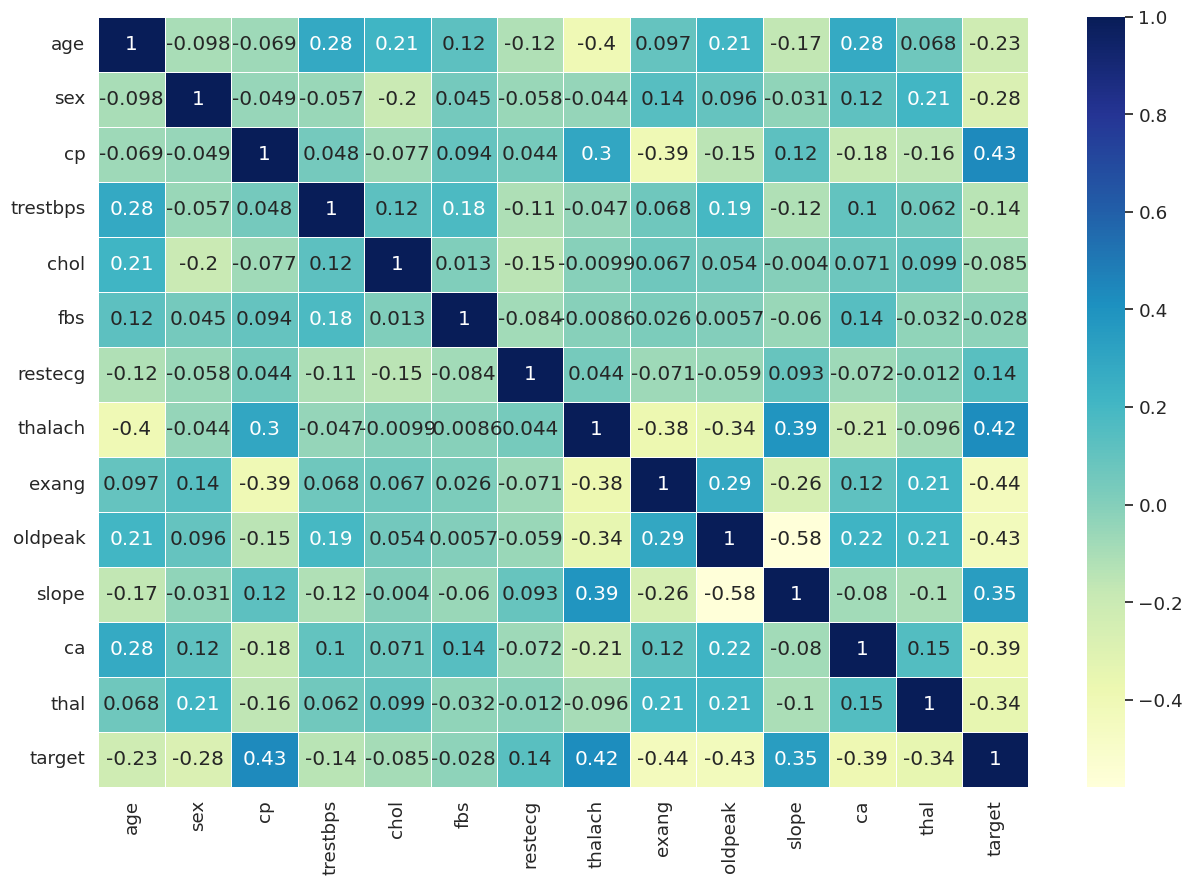

In [11]:

# Plot heatmap showing correlation between different features
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

In [12]:
# Extracting target and descriptive features
# Store all the features from the data in X
X = data.drop('target', axis=1)

# Store all the labels in y
y = data['target']

# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()


In [13]:

# Creating training and validation datasets

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=random_state)

In [14]:
# Using sklearn library to train a Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# tree visualization helper function
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

"""
clf: DecisionTreeClassifier

Returns a bytes object representing the image of the tree
"""
def get_tree_image(clf):
    dot_data = StringIO()
    feature_names=data.drop('target',axis=1).columns
    class_names=["No Disease", "Heart Disease"]
    export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    return graph.create_png()


Training Accuracy (Entropy): 1.000
Training Accuracy (Gini): 1.000
Validation Accuracy (Entropy): 0.836
Validation Accuracy (Gini): 0.836


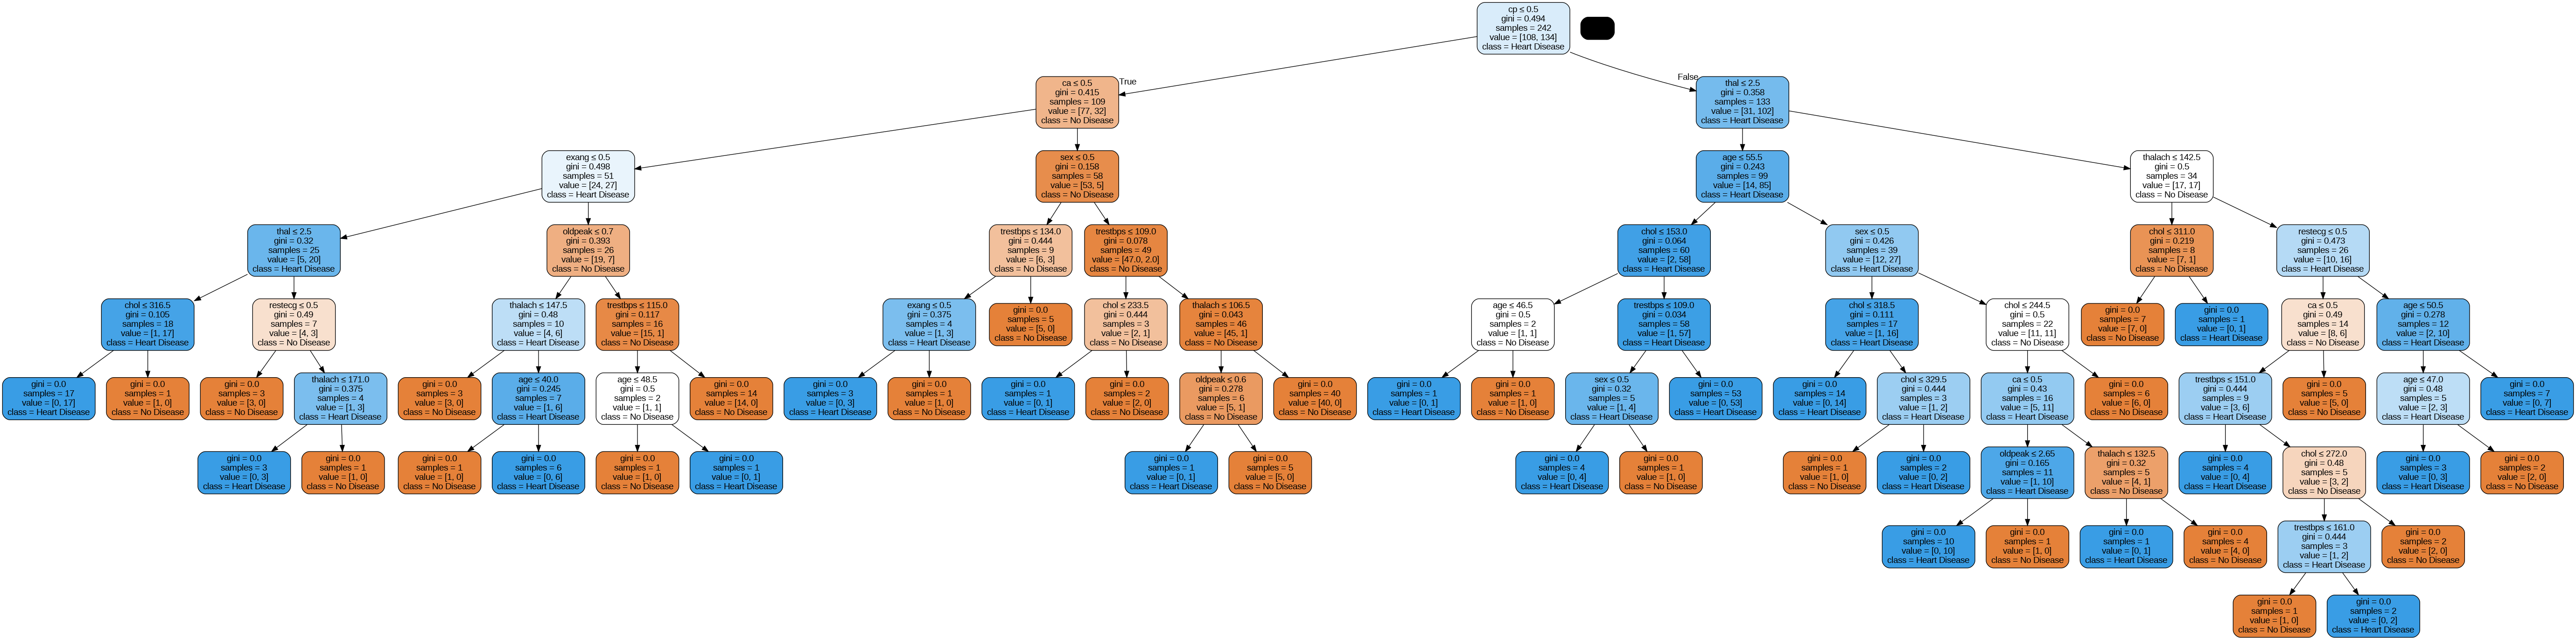

In [15]:
# Exercise 1a: Fitting and interpretting a decision tree

entropy_clf = DecisionTreeClassifier(criterion='entropy',random_state=random_state)
entropy_clf.fit(X_train,y_train)

gini_clf = DecisionTreeClassifier(criterion='gini',random_state=random_state)
gini_clf.fit(X_train,y_train)

training_accuracy_entropy = accuracy_score(y_train,entropy_clf.predict(X_train))
training_accuracy_gini = accuracy_score(y_train,gini_clf.predict(X_train))

validation_accuracy_entropy = accuracy_score(y_val,entropy_clf.predict(X_val))
validation_accuracy_gini = accuracy_score(y_val,gini_clf.predict(X_val))

# Reporting the training and validation set accuracies for each classfier

print(f"Training Accuracy (Entropy): {training_accuracy_entropy:.3f}")
print(f"Training Accuracy (Gini): {training_accuracy_gini:.3f}")

print(f"Validation Accuracy (Entropy): {validation_accuracy_entropy:.3f}")
print(f"Validation Accuracy (Gini): {validation_accuracy_gini:.3f}")

# Visualization of the decision tree with the best validation performance

best_clf = entropy_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

best_clf = gini_clf
tree_image=get_tree_image(best_clf)
Image(tree_image)

Indicate the most informative descriptive feature (with the threshold) and briefly explain why this is the most informative (from an algorithmic viewpoint).

Answer: The most informative descriptive feature is cp with a threshold of ≤ 0.5. It is the most informative as it has the highest gini gain and therefore the highest information gain, as the algorithm chose the feature that resulted in the reduction of impurity.

Briefly comment on the tree's depth and what factors may contribute to the shallowness/complexity of the tree.
Answer: The tree's depth is 8 based on the length from the root node to the farthest leaf node. The complexity of the tree is based on choosing a node that reduces the impurity the most for a split and any pruning criteria coded into the algorithm. The shallowness of this tree is stributed to large impurity reductions in node choices from earlier on.

Show how one can interpret the tree by specifying the rule from its left most branch.
Answer:
The rule leading to its left most branch is if:
cp ≤ 0.5
ca ≤ 0.5
exang ≤ 0.5
thal ≤ 2.5
chol ≤ 316.5
We will predict a heart disease.


In [16]:
# Prepruning a decision tree to improve the classifier's generalization performance by varying max_depth

training_accuracies=[]
validation_accuracies=[]
depths = [None, 1, 3, 5, 7]

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=random_state)
    clf.fit(X_train,y_train)

    training_accuracies.append(accuracy_score(y_train,clf.predict(X_train)))
    validation_accuracies.append(accuracy_score(y_val,clf.predict(X_val)))

print("max_depth | Training Acc | Validation Acc")
print("----------------------------------------")
for d, t, v in zip(depths, training_accuracies, validation_accuracies):
    print(f"{str(d):>8} | {t:.3f}        | {v:.3f}")



max_depth | Training Acc | Validation Acc
----------------------------------------
    None | 1.000        | 0.836
       1 | 0.740        | 0.836
       3 | 0.818        | 0.820
       5 | 0.942        | 0.852
       7 | 0.992        | 0.836



Analyze the effect of increasing tree depth on training and validation performance.

Answer: As max_depth increases, the training accuracy increases consistently because the model is better able to attune to the training data with more depth. On the other hand, as max_depth increases, the validation accuracy follows a curve. A low max_depth underfits, an intermediate max_depth leads to the highest accuracy, then a higher max_depth overfits. From the data acquired, we can see that the best prepruning is when the max_depth is 5 as it has the best generalization to the validation set.

In [17]:
# Post-pruning a decision tree (reduced error pruning, using the validation set to decide which nodes to prune)

# Fit new trees if you want to keep the trees in 1a unmodified
gini_clf = DecisionTreeClassifier(criterion='gini',random_state=random_state)
gini_clf.fit(X_train,y_train)
entropy_clf = DecisionTreeClassifier(criterion='entropy',random_state=random_state)
entropy_clf.fit(X_train,y_train)

def reduced_error_pruning(dtree, X_val, y_val):
    """
    Perform reduced error pruning on a decision tree classifier.

    This function directly modifies the decision tree passed as an argument.

    Args:
    dtree: DecisionTreeClassifier
        The decision tree to prune, must be already fitted.
    X_val: array-like
        Validation features used to prune the tree.
    y_val: array-like
        Validation labels used to determine pruning effectiveness.

    Returns:
    dtree: DecisionTreeClassifier
        The pruned decision tree.
    """

    # Access the internal tree structure to identify non-leaf nodes
    non_leaf_nodes = [i for i in range(dtree.tree_.node_count) if dtree.tree_.children_left[i] != dtree.tree_.children_right[i]]

    # Track the best accuracy and corresponding tree configuration. initialize with original accuracy.
    best_acc = accuracy_score(y_val, dtree.predict(X_val))

    # Iterate over non-leaf nodes in reverse order to consider pruning from the bottom up
    for i in reversed(non_leaf_nodes):
        # Store current node children to restore if needed
        left, right = dtree.tree_.children_left[i], dtree.tree_.children_right[i]

        # Temporarily make the node a leaf
        dtree.tree_.children_left[i], dtree.tree_.children_right[i] = -1, -1

        # Calculate the accuracy of the tree with the node pruned (turned into a leaf)
        temp_acc = accuracy_score(y_val, dtree.predict(X_val))

        if temp_acc < best_acc: # Revert pruning if accuracy decreases
            # Restore the node to its original state
            dtree.tree_.children_left[i], dtree.tree_.children_right[i] = left, right
        else:
            # Update the best accuracy observed
            best_acc = temp_acc

    return dtree  # Return the modified tree


pruned_entropy = reduced_error_pruning(entropy_clf, X_val, y_val)
pruned_entropy_acc = accuracy_score(y_val, pruned_entropy.predict(X_val))
print(f"Validation accuracy of entropy tree after pruning: {pruned_entropy_acc:.4f}")

pruned_gini = reduced_error_pruning(gini_clf, X_val, y_val)
pruned_gini_acc = accuracy_score(y_val, pruned_gini.predict(X_val))
print(f"Validation accuracy of gini tree after pruning: {pruned_gini_acc:.4f}")

Validation accuracy of entropy tree after pruning: 0.9344
Validation accuracy of gini tree after pruning: 0.9180


In [18]:
# Exercise 2: Learning an Ensemble of decision trees

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree_no = [10, 50, 100, 400, 1000]
validation_accuracies = []

for n in tree_no:
    rf_clf = RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=random_state)
    rf_clf.fit(X_train,y_train)

    training_accuracy_rf = accuracy_score(y_train,rf_clf.predict(X_train))
    validation_accuracy_rf = accuracy_score(y_val,rf_clf.predict(X_val))

    validation_accuracies.append(validation_accuracy_rf)

# Reporting the validation set accuracies for each classifier

print("n_estimators | Validation Acc")
print("---------------------------")
for n, v in zip(tree_no, validation_accuracies):
    print(f"{str(n):>12} | {v:.3f}")




n_estimators | Validation Acc
---------------------------
          10 | 0.902
          50 | 0.885
         100 | 0.902
         400 | 0.869
        1000 | 0.885



Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing Random Forest classifier against the Decision Tree Classifier trained with entropy (Ex. 1a) and explain any difference.

Answer: As the number of trees increases in the Random Forest model, the validation accuracy is initially high and peaks around 100 trees. Beyond this point, validation accuracy decreases slightly and appears less stable. Compared to the single decision tree with entropy with a validation accuracy of 0.836, the Random Forest with 10 or 100 trees performs better because bagging reduces variance preventing overfitting.

In [20]:
# Fit a Gradient Boost Decision Tree by varying the number of boosting steps/trees

tree_no = [5, 10, 20, 50, 100, 200]

training_accuracies = []
validation_accuracies = []

for n in tree_no:
    gb_clf = GradientBoostingClassifier(n_estimators=n,n_iter_no_change=100,
    validation_fraction=0.2,random_state=random_state)
    gb_clf.fit(X_train,y_train)

    training_accuracy_gb = accuracy_score(y_train,gb_clf.predict(X_train))
    validation_accuracy_gb = accuracy_score(y_val,gb_clf.predict(X_val))

    training_accuracies.append(training_accuracy_gb)
    validation_accuracies.append(validation_accuracy_gb)

# Report the training and validation set accuracies for each classifier

print("n_estimators | Training Acc | Validation Acc")
print("--------------------------------------------")
for n, t, v in zip(tree_no, training_accuracies, validation_accuracies):
    print(f"{str(n):>12} | {t:.3f}        | {v:.3f}")




n_estimators | Training Acc | Validation Acc
--------------------------------------------
           5 | 0.855        | 0.852
          10 | 0.888        | 0.869
          20 | 0.917        | 0.885
          50 | 0.934        | 0.885
         100 | 0.963        | 0.885
         200 | 0.963        | 0.852



Comment on the effect of increasing the number of trees on validation performance. Compare the performance of the best performing GBDT against that of the best performing Random Forest classifier (Ex. 2a) and Decision Tree classifier trained with entropy (Ex. 1a).

Answer: As the number of trees increases in the Gradient Boosted Decision Tree, the validation accuracy follows a curve. Starting off low due to an underfitting, it peaks at 20-100 trees stabilising at its highest value 0.885, and then drops back to its inital at 200 trees, indicative of an overfitting. This is because the boosting algorithm adds trees sequentially and is biased to pay more attention to instances that earlier trees misclassified, using a weighted dataset. Thus at 5-10 trees, not enough correction factor has accumulated  while at 200 trees, the model starts to over-correct to noisy data.

Compared to the best performing Random Forest Classifier (0.902), and the Decision Tree Classifier (0.836), the GBDT falls short from the fist because bagging had a very obvious effect on this dataset, but beats the latter single decision tree classifier.